# THE SPARKS FOUNDATION     
Inspire, Innovate, & Integrate

## GRIP JANUARY 2022 Task #1 submission by Meena Pargain

### Problem Statement: Predict the percentage of student based on the number of study hours.What will be the predicted score if a student studies for 9.25 hours/day.

### Simple Linear Regression 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [38]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
# Read the file
df=pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
# Check shape of the data
df.shape

(25, 2)

In [41]:
# Check missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [42]:
# Check info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


No null values in both the variables.
Both the variables are numerical.

In [43]:
# Discriptive summary of the data set
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## EDA 

<AxesSubplot:>

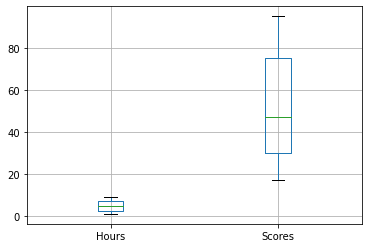

In [44]:
# Check for outliers
df.boxplot()

No outliers in the dataset

<AxesSubplot:>

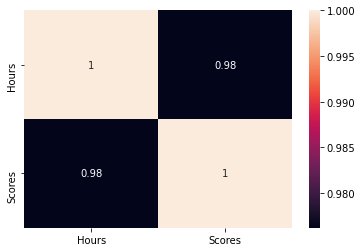

In [46]:
# Visualization using Heatmap
sns.heatmap(df.corr(),annot=True)

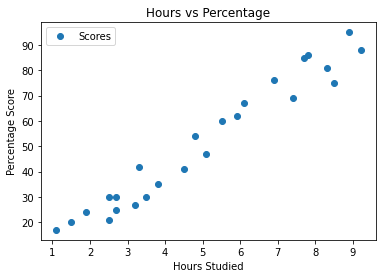

In [47]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score,number of study hours increases then scores of the student also increases.

In [48]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Model Building

In [49]:
# Train Test Split
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [50]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
print("Training complete.")

Training complete.


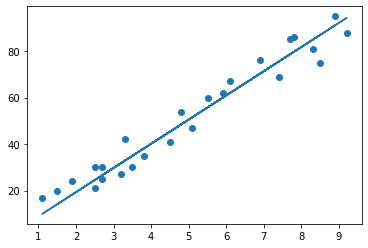

In [51]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [52]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]
 [7.4]]


In [53]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


In [54]:
# Predict Score
hours = 9.25
pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 94.78722212956563


## Evaluating the model

In [55]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 7.169048271425507


From the above model we predicted that if number of study hours is 9.25 then score will be 94.788